# Practica 02_SQL: BigQuery en Python

## Scenario
You're part of a public health organization which is tasked with identifying answers to
queries related to the Covid-19 pandemic. Obtaining the right answers will help the
organization in planning and focusing healthcare efforts and awareness programs appropriately.  

The dataset and table that will be used for this analysis will be : `bigquery-public-
data.covid19_open_data.covid19_open_data`. This repository contains country-level datasets
of daily time-series data related to COVID-19 globally. It includes data relating to
demographics, economy, epidemiology, geography, health, hospitalizations, mobility,
government response, and weather.

In [1]:
# Cargo las librerias
from google.cloud import bigquery
from google.oauth2 import service_account 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lo primero es poner las credenciales y el client de SQL
# Cargo mis credenciales en GCP
# Definimos las credenciales y el proj_id para hacer consultas
creds =  service_account.Credentials.from_service_account_file("/home/jovyan/.creds/trim-heaven-301811-6adb071d036f.json")
proj_id = "trim-heaven-301811"
# llamamos la función client
client = bigquery.Client(project =proj_id, credentials=creds ) # es la variable que hace las consultas a la API

### Query 1: Total Confirmed Cases
Build a query that will answer "What was the total count of con rmed cases on Apr 15,
2020?" The query needs to return a single row containing the sum of con rmed cases across all
countries. The name of the column should be **total_cases_worldwide**.

In [3]:
# Para hacer la query hay que usar  new_confirmed y date
query = """
SELECT 
    date as fecha,
    sum(new_confirmed) as casos_totales,
FROM 
`bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE date = '2020-04-15'
GROUP BY date
"""

In [4]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [5]:
df = query_job.to_dataframe()
df

,fecha,casos_totales
0,2020-04-15,203788


### Query 2: Worst Affected Areas
Build a query for answering "How many states in the US had more than 100 deaths on Apr
10, 2020?" The query needs to list the output in the field **count_of_states**. Hint: Don't include
NULL values.

In [6]:
query = """
SELECT
    region,
    total_death    
FROM (SELECT 
    sum(new_deceased) as total_death,
    subregion1_name AS region,
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE date = '2020-04-10' 
    and country_code = 'US'
    AND subregion1_name is not null
GROUP BY subregion1_name)
WHERE total_death > 100
ORDER BY total_death DESC 
"""

In [7]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [8]:
df = query_job.to_dataframe()
df

,region,total_death
0,New York,2052
1,New Jersey,519
2,Michigan,363
3,Massachusetts,203
4,Pennsylvania,155
5,Illinois,136
6,Connecticut,134
7,Indiana,109
8,Louisiana,106


### Query 3: Identifying Hotspots
Build a query that will answer "List all the states in the United States of America that had
more than 1000 con rmed cases on Apr 10, 2020?" The query needs to return the State Name
and the corresponding con rmed cases arranged in descending order. Name of the fields to
return **state and total_confirmed_cases**.

In [9]:
query = """SELECT
    state,
    total_confirmed_cases    
FROM (SELECT 
    sum(new_confirmed) as total_confirmed_cases,
    subregion1_name AS state,
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE date = '2020-04-10' 
    and country_code = 'US'
    AND subregion1_name is not null
GROUP BY subregion1_name)
WHERE total_confirmed_cases > 1000
ORDER BY total_confirmed_cases DESC 
"""

In [10]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [11]:
df = query_job.to_dataframe()
df

,state,total_confirmed_cases
0,New York,24799
1,New Jersey,7469
2,Massachusetts,4141
3,Pennsylvania,3501
4,Illinois,2914
5,Texas,2910
6,California,2416
7,Michigan,2280
8,Florida,2246
9,Louisiana,1936


### Query 4: Fatality Ratio
Build a query that will answer "What was the case-fatality ratio in Italy for the month of April 2020?" Case-fatality ratio here is de defined as (total deaths / total confirmed cases) * 100.
Write a query to return the ratio for the month of April 2020 and containing the following fields
in the output: **total_con rmed_cases, total_deaths, case_fatality_ratio**.

In [12]:
# Hago un query para ver si el codigo de italia es IT
query = """
SELECT 
    *
FROM 
`bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_code = 'IT'
limit 50
"""

In [13]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [14]:
df = query_job.to_dataframe()
df

,date,location_key,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,...,datacommons_id,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm
0,2020-04-13,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),16.206349,7.230159,23.055556,0.000000,NaN
1,2020-04-14,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),14.166667,9.534722,21.069444,1.333500,NaN
2,2020-04-15,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),11.486111,5.027778,16.416667,0.095250,NaN
3,2020-04-16,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),12.201389,3.104167,19.805556,0.000000,NaN
4,2020-04-17,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),14.326389,4.972222,21.187500,0.000000,NaN
5,2020-04-18,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),15.937500,8.312500,21.944444,0.000000,NaN
6,2020-04-19,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),17.000000,11.305556,22.548611,0.000000,NaN
7,2020-04-20,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),14.597222,12.798611,16.048611,6.159500,NaN
8,2020-04-21,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),13.402778,11.708333,15.041667,4.476750,NaN
9,2020-04-22,IT_45_RA,IT,Italy,45,Emilia-Romagna,RA,Ravenna,IT,ITA,...,iso/IT-RA,42889,44.417778,12.199444,POINT(12.199444 44.417778),15.000000,9.826389,19.131944,0.285750,NaN


In [15]:
# He visto que si y procedo a hacer la consulta. 
query = """
SELECT
    total_confirmed_cases,
    total_deaths,
    (total_deaths/total_confirmed_cases) * 100  as case_fatality_ratio    
FROM (SELECT 
    sum(new_confirmed) as total_confirmed_cases,
    sum(new_deceased) as total_deaths,
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE EXTRACT(month from date) = 4 and
    EXTRACT(year from date) = 2020 and
    country_code = 'IT'
)
"""

In [16]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [17]:
df = query_job.to_dataframe()
df

,total_confirmed_cases,total_deaths,case_fatality_ratio
0,294012,31078,10.570317


### Query 5: Identifying specific day
Build a query that will answer: "On what day did the total number of deaths cross 10000 in
Italy?" The query should return the date in the format **yyyy-mm-dd**.

In [18]:
# Hay que detectar el día en el cual las muertes superan los 10.000. Filtro por los días que las muertes son más de 10.000 y poner limite en 1. 
query = """
SELECT
    date AS fecha,
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_code = 'IT' and cumulative_deceased > 10000
limit 1
"""

In [19]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [20]:
df = query_job.to_dataframe()
df

,fecha
0,2020-03-28


### Query 6: Finding days with zero net new cases
The following query is written to identify the number of days in India between 21 Feb 2020
and 15 March 2020 when there were zero increases in the number of con rmed cases. However
it is not executing properly. You need to update the query to complete it and obtain the result:

```
WITH india_cases_by_date AS (
SELECT
date,
SUM(cumulative_confirmed) AS cases
FROM
`bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
country_name="India"
AND date between '2020-02-21' and '2020-03-15'
GROUP BY
date
ORDER BY
date ASC
)
, india_previous_day_comparison AS
(SELECT
date,
cases,
LAG(cases) OVER(ORDER BY date) AS previous_day,
cases - LAG(cases) OVER(ORDER BY date) AS net_new_cases
FROM india_cases_by_date
)
```

In [21]:
query = """
WITH india_cases_by_date AS (
SELECT
    date,
    SUM(cumulative_confirmed) AS cases
FROM
    `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
    country_name="India"
AND date between '2020-02-21' and '2020-03-15'
GROUP BY
    date
ORDER BY
    date ASC
), india_previous_day_comparison as (
SELECT
    date,
    cases,
    LAG(cases) OVER(ORDER BY date) AS previous_day,
    cases - LAG(cases) OVER(ORDER BY date) AS net_new_cases
FROM india_cases_by_date)
SELECT 
    date,
    cases,
    previous_day,
    net_new_cases
FROM india_previous_day_comparison
WHERE net_new_cases = 0
ORDER BY date
"""

In [22]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [23]:
df = query_job.to_dataframe()
df

,date,cases,previous_day,net_new_cases
0,2020-02-22,7,7,0
1,2020-02-23,7,7,0
2,2020-02-24,7,7,0
3,2020-02-25,7,7,0
4,2020-02-26,7,7,0
5,2020-02-27,7,7,0
6,2020-02-28,7,7,0
7,2020-03-01,9,9,0


### Query 7: Doubling rate
Using the previous query as a template, write a query to find out the dates on which the
confirmed cases increased by more than 10% compared to the previous day (indicating doubling
rate of ~ 7 days) in the US between the dates March 22, 2020 and April 20, 2020. The query
needs to return the list of dates, the confirmed cases on that day, the confirmed cases the previous day, and the percentage increase in cases between the days. Use the following names
for the returned fields: **Date, Confirmed_Cases_On_Day, Confirmed_Cases_Previous_Day and
Percentage_Increase_In_Cases**.

In [24]:
query = """
WITH US_cases_by_date AS (
SELECT
    date,
    SUM(cumulative_confirmed) AS Confirmed_Cases_On_Day
FROM
    `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
    country_name="United States of America"
AND date between '2020-03-22' and '2020-04-20'
GROUP BY
    date
ORDER BY
    date ASC
), US_previous_day_comparison as (
SELECT
    date,
    Confirmed_Cases_On_Day,
    LAG(Confirmed_Cases_On_Day) OVER(ORDER BY date) AS Confirmed_Cases_Previous_Day,
    (( Confirmed_Cases_On_Day / LAG(Confirmed_Cases_On_Day) OVER(ORDER BY date)) - 1)*100 as Percentage_Increase_In_Cases
FROM US_cases_by_date)
SELECT 
    date,
    Confirmed_Cases_On_Day,
    Confirmed_Cases_Previous_Day,
    ROUND(Percentage_Increase_In_Cases,2) as Percentage_Increase_In_Cases
FROM US_previous_day_comparison
WHERE Percentage_Increase_In_Cases > 10
ORDER BY date
"""

In [25]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [26]:
df = query_job.to_dataframe()
df

,date,Confirmed_Cases_On_Day,Confirmed_Cases_Previous_Day,Percentage_Increase_In_Cases
0,2020-03-23,189845,164155,15.65
1,2020-03-24,234144,189845,23.33
2,2020-03-25,265938,234144,13.58
3,2020-03-26,323650,265938,21.70
4,2020-03-27,386030,323650,19.27
5,2020-03-28,446627,386030,15.70
6,2020-03-29,506845,446627,13.48
7,2020-03-30,579826,506845,14.40
8,2020-03-31,659884,579826,13.81
9,2020-04-01,744665,659884,12.85


### Query 8: Recovery rate
Build a query to list the recovery rates of countries arranged in descending order (limit to
10) on the date May 10, 2020. Restrict the query to only those countries having more than 50K
confirmed cases. The query needs to return the following fields: **country, recovered_cases,
confirmed_cases, recovery_rate**.

In [27]:
query = """
SELECT 
    country,
    confirmed_cases,
    recovered_cases,
    round((recovered_cases/confirmed_cases),2) AS recovery_rate
FROM (
    SELECT
        country_name as country,
        sum(cumulative_confirmed) as confirmed_cases,
        sum(cumulative_recovered) as recovered_cases,
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE date = '2020-05-10'
GROUP BY country
)
WHERE confirmed_cases > 50000
order by  recovery_rate DESC 
limit 10
"""

In [28]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [29]:
df = query_job.to_dataframe()
df

,country,confirmed_cases,recovered_cases,recovery_rate
0,France,216220,4566869,21.12
1,China,156251,146635,0.94
2,Germany,424555,240948,0.57
3,Italy,643471,210372,0.33
4,Canada,207551,64192,0.31
5,Philippines,56890,15492,0.27
6,Chile,57674,13112,0.23
7,India,194859,38131,0.20
8,Brazil,571697,64957,0.11
9,Switzerland,59276,3866,0.07


In [30]:
# Me sorprende el dato de FR voy a revisar el DF de francia
query = """
SELECT 
    *
FROM 
`bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_code = 'FR'
"""

In [31]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [32]:
df = query_job.to_dataframe()
df

,date,location_key,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,...,datacommons_id,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm
0,2020-01-01,FR,FR,France,None,None,None,None,FR,FRA,...,country/FRA,2202162.0,47.000,2.000,POINT(2 47),4.688889,0.205556,7.411111,0.028222,NaN
1,2020-01-02,FR,FR,France,None,None,None,None,FR,FRA,...,country/FRA,2202162.0,47.000,2.000,POINT(2 47),7.544444,4.927778,9.372222,2.427111,NaN
2,2020-01-03,FR,FR,France,None,None,None,None,FR,FRA,...,country/FRA,2202162.0,47.000,2.000,POINT(2 47),8.544444,4.350000,11.077778,0.366889,NaN
3,2020-01-04,FR,FR,France,None,None,None,None,FR,FRA,...,country/FRA,2202162.0,47.000,2.000,POINT(2 47),5.283333,1.155556,9.611111,0.965200,NaN
4,2020-01-05,FR,FR,France,None,None,None,None,FR,FRA,...,country/FRA,2202162.0,47.000,2.000,POINT(2 47),4.544444,0.033333,8.683333,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49083,2021-02-15,FR_PM,FR,France,PM,Saint Pierre and Miquelon,None,None,FR,FRA,...,None,NaN,46.825,-56.275,POINT(-56.275 46.825),NaN,NaN,NaN,NaN,NaN
49084,2021-02-16,FR_PM,FR,France,PM,Saint Pierre and Miquelon,None,None,FR,FRA,...,None,NaN,46.825,-56.275,POINT(-56.275 46.825),NaN,NaN,NaN,NaN,NaN
49085,2021-02-17,FR_PM,FR,France,PM,Saint Pierre and Miquelon,None,None,FR,FRA,...,None,NaN,46.825,-56.275,POINT(-56.275 46.825),NaN,NaN,NaN,NaN,NaN
49086,2021-02-18,FR_PM,FR,France,PM,Saint Pierre and Miquelon,None,None,FR,FRA,...,None,NaN,46.825,-56.275,POINT(-56.275 46.825),NaN,NaN,NaN,NaN,NaN


In [33]:
import numpy as np
import matplotlib.pyplot as plt

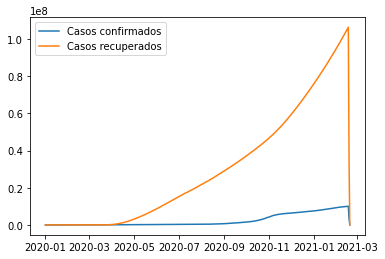

In [34]:
plt.plot(df.set_index('date').groupby('date')['cumulative_confirmed'].sum(), label = "Casos confirmados")
plt.plot(df.set_index('date').groupby('date')['cumulative_recovered'].sum(), label = "Casos recuperados")
plt.legend()


Veo que los datos no cuadran, los total recuperados son muchos más que los acmulados confirmados. Con los otros paises este dato tiene más sentido. 

### Query 9: CDGR - Cumulative Daily Growth Rate
The following query is trying to calculate the CDGR on May 10, 2020(Cumulative Daily
Growth Rate) for France since the day the rst case was reported. The rst case was reported on
Jan 24, 2020. The CDGR is calculated as:  

`((last_day_cases/first_day_cases)^1/days_diff)-1)`

Where :
* `last_day_cases` is the number of con rmed cases on May 10, 2020
* `first_day_cases` is the number of con rmed cases on Feb 02, 2020
* `days_diff` is the number of days between Feb 02 - May 10, 2020  

The query isn’t executing properly. Can you x the error to make the query execute
successfully?

```
WITH
france_cases AS (
SELECT
date,
SUM(cumulative_confirmed) AS total_cases
FROM
`bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
country_name="France"
AND date IN ('2020-01-24',
'2020-05-10')
GROUP BY
date
ORDER BY
date)
, summary as (
SELECT
total_cases AS first_day_cases,
LEAD(total_cases) AS last_day_cases,
DATE_DIFF(LEAD(date) OVER(ORDER BY date),date, day) AS days_diff
FROMfrance_cases
LIMIT 1
)
select first_day_cases, last_day_cases, days_diff,
SQRT((last_day_cases/first_day_cases),(1/days_diff))-1 as cdgr
from summary
```

**Note**: Refer to the following page to learn more about the SQL function referenced `LEAD()` .

In [35]:
query = """
WITH
france_cases AS (
SELECT
    date,
    SUM(cumulative_confirmed) AS total_cases
FROM
    `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
    country_name="France"
AND date IN ('2020-01-24','2020-05-10')
GROUP BY
    date
ORDER BY
    date)
, summary as (
SELECT
    total_cases AS first_day_cases,
    LEAD(total_cases) OVER(ORDER BY date) AS last_day_cases,
    DATE_DIFF(LEAD(date) OVER(ORDER BY date),date, day) AS days_diff
FROM france_cases
LIMIT 1
)

select 
    first_day_cases, 
    last_day_cases, 
    days_diff,
    POW(last_day_cases/first_day_cases ,1/days_diff)-1 as cdgr
from summary
"""

In [36]:
query_job = client.query(query)
query_job.state

'RUNNING'

In [38]:
df = query_job.to_dataframe()
df


,first_day_cases,last_day_cases,days_diff,cdgr
0,216220,NaN,NaN,NaN


### Create a Datastudio report
Create a Datastudio report that plots the following for the United States:
* Number of Con rmed Cases
* Number of Deaths
* Date range : 2020-03-15 to 2020-04-30


**Hint**: Use the below image as a reference while building the report and make sure your
report matches it.